In [170]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
import numpy

with MPRester("GlyakcTTvuJ54zVW") as m:
    results = m.query("mp-561619", ['cif'])[0]
a=open("local.cif",'w')
b=results.items()
for d,w in b:
    a.write(str(w))
a.close()

parser = CifParser("local.cif")
structure = parser.get_structures(True)[0]
#permet d'obtenir la structure du matériau

La bande interdite est décrite par : {'direct': False, 'energy': 2.1704, 'transition': '\\Gamma-F'}
A titre informatif voici la structure de bande avec en rouge le minimum de la bande de conduction et en vert le maximum de la  bande de valence


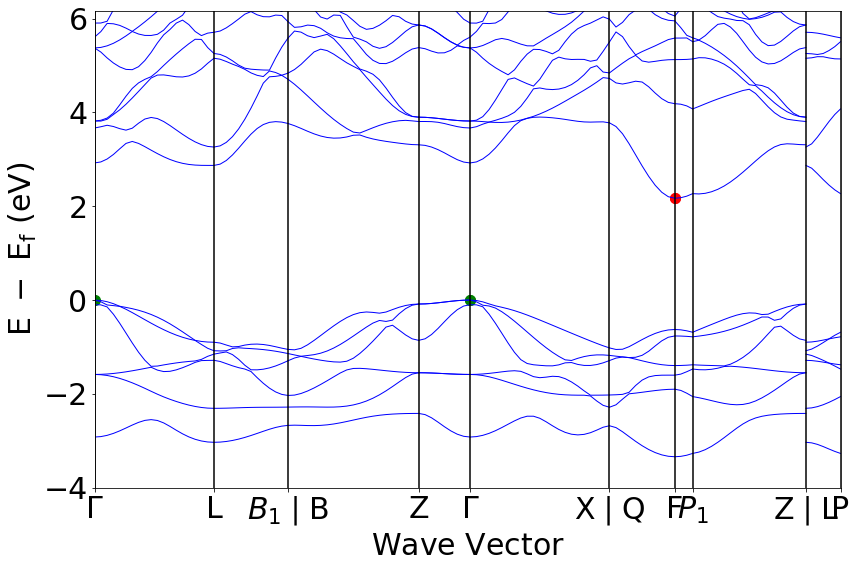

Représentation de la zone de brillouin du matériau avec : 
 -En rouge la  droite représentant la direction de dispersion du minimum de la première bande de conduction. L'extrémité de la droite est marquée par un point bleu noté CBM.  
 -La direction de dispersion du maximum de la dernière bande de valence est un point bleu noté CVM


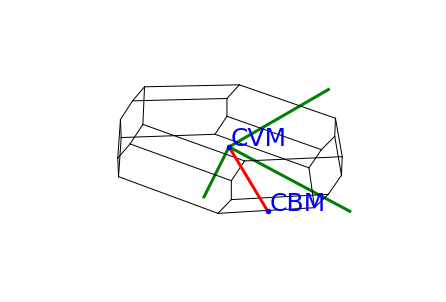

In [179]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.plotter import plot_brillouin_zone


c=structure.lattice.reciprocal_lattice
p=MPRester("GlyakcTTvuJ54zVW")
#Sort un dict avec les données relatives à la structure de band du matériau
j=p.get_bandstructure_by_material_id("mp-561619")
#calcule la valeur de la bande interdite
k=j.get_band_gap()
print("La bande interdite est décrite par :",k)
#permet d'extraire du dict j contenant les informations sur la structure de bande les coordonnées de cbm (minimum de la bande de conduction) et cvm (maximum de la bande de valence)
l=j.get_vbm()
m=j.get_cbm()
print("A titre informatif voici la structure de bande avec en rouge le minimum de la bande de conduction et en vert le maximum de la  bande de valence")
plt =BSPlotter(j).get_plot(vbm_cbm_marker=True)
plt.show()
print("Représentation de la zone de brillouin du matériau avec :","\n","-En rouge la  droite représentant la direction de dispersion du minimum de la première bande de conduction. L'extrémité de la droite est marquée par un point bleu noté CBM. ","\n","-La direction de dispersion du maximum de la dernière bande de valence est un point bleu noté CVM" )
plt=plot_brillouin_zone(c,lines=[[[0., 0., 0.],m['kpoint'].cart_coords]],labels={"CBM" : m['kpoint'].cart_coords,"CVM" : l['kpoint'].cart_coords}, kpoints=None, fold=False, coords_are_cartesian=True, ax=None)
